In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
training_data = image_dataset_from_directory(
    '../data/chest_xray/train', 
    labels='inferred',
    validation_split = 0.2,
    subset="training",
    seed=14)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.


In [3]:
validation_data = image_dataset_from_directory(
    '../data/chest_xray/train', 
    labels='inferred',
    validation_split = 0.2,
    subset="validation",
    seed=14)

Found 5216 files belonging to 2 classes.
Using 1043 files for validation.


In [61]:
validation_data.take(10)

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [9]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [10]:
aug_ds = training_data.map( lambda x, y: (data_augmentation(x, training=True), y))


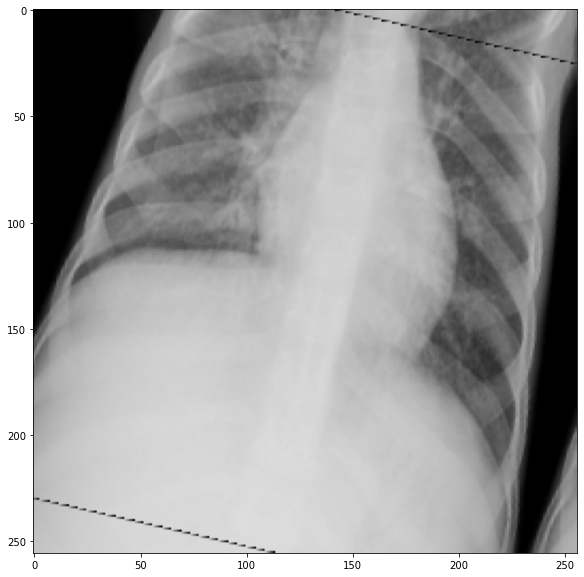

In [11]:
plt.figure(figsize=(10, 10))
for image, label in aug_ds.take(1):
    for i in range(1):
        test = image[i].numpy()
        #print(image.shape)
        plt.imshow(image[i].numpy().astype('uint8'))

In [ ]:
#test

In [6]:
#image_batch, labels_batch = next(iter(training_data))

In [13]:
#image_batch[0]

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 91.930786,  91.930786,  91.930786],
        [ 95.1759  ,  95.1759  ,  95.1759  ],
        [ 92.5     ,  92.5     ,  92.5     ],
        ...,
        [ 69.97656 ,  69.97656 ,  69.97656 ],
        [ 67.258545,  67.258545,  67.258545],
        [ 70.25537 ,  70.25537 ,  70.25537 ]],

       [[ 99.034546,  99.034546,  99.034546],
        [100.55969 , 100.55969 , 100.55969 ],
        [ 95.73108 ,  95.73108 ,  95.73108 ],
        ...,
        [ 74.05017 ,  74.05017 ,  74.05017 ],
        [ 74.88989 ,  74.88989 ,  74.88989 ],
        [ 75.64819 ,  75.64819 ,  75.64819 ]],

       [[120.47656 , 120.47656 , 120.47656 ],
        [ 95.97864 ,  95.97864 ,  95.97864 ],
        [ 87.967285,  87.967285,  87.967285],
        ...,
        [ 73.49768 ,  73.49768 ,  73.49768 ],
        [ 70.215454,  70.215454,  70.215454],
        [ 78.03235 ,  78.03235 ,  78.03235 ]],

       ...,

       [[  0.      ,   0.      ,   0.      ],
        [  0.

In [4]:
training_data

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [5]:
training_data.class_names

['NORMAL', 'PNEUMONIA']

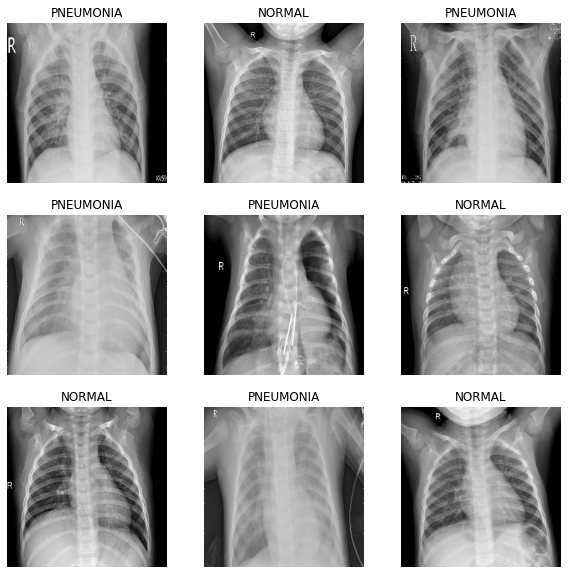

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in training_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(training_data.class_names[labels[i]])
        plt.axis("off")

In [ ]:
#AUTOTUNE = tf.data.AUTOTUNE

#training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
#normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [14]:
#normalized_train_data = training_data.map(lambda x, y: (normalization_layer(x), y))

In [7]:
model = Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(28, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0

In [10]:
epochs=10
history = model.fit(
  training_data,
  validation_data = validation_data,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 137s 1s/step - loss: 0.2134 - accuracy: 0.9080 - val_loss: 0.1698 - val_accuracy: 0.9453
Epoch 2/10
131/131 [==============================] - 136s 1s/step - loss: 0.1021 - accuracy: 0.9636 - val_loss: 0.1256 - val_accuracy: 0.9492
Epoch 3/10
131/131 [==============================] - 136s 1s/step - loss: 0.0847 - accuracy: 0.9672 - val_loss: 0.1009 - val_accuracy: 0.9636
Epoch 4/10
131/131 [==============================] - 137s 1s/step - loss: 0.0469 - accuracy: 0.9832 - val_loss: 0.0923 - val_accuracy: 0.9645
Epoch 5/10
131/131 [==============================] - 137s 1s/step - loss: 0.0347 - accuracy: 0.9883 - val_loss: 0.1116 - val_accuracy: 0.9616
Epoch 6/10
131/131 [==============================] - 138s 1s/step - loss: 0.0433 - accuracy: 0.9830 - val_loss: 0.1740 - val_accuracy: 0.9396
Epoch 7/10
131/131 [==============================] - 138s 1s/step - loss: 0.0285 - accuracy: 0.9880 - val_loss: 0.0982 - val_accuracy: 0.9703

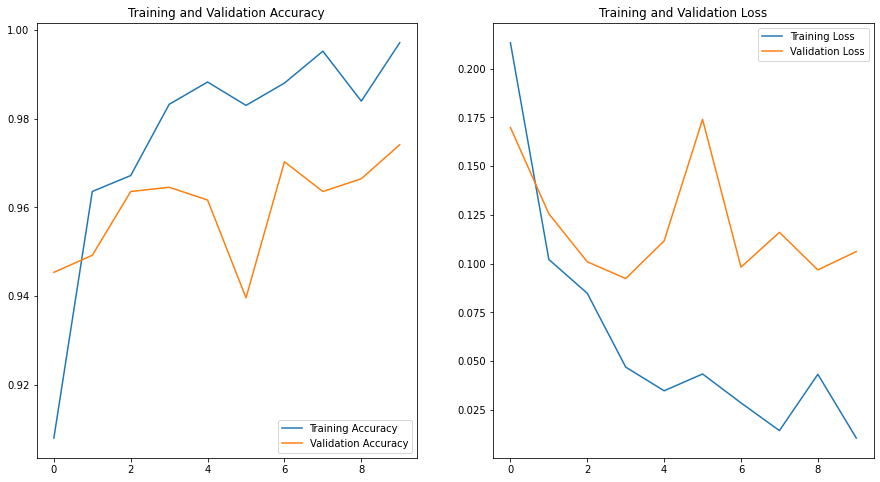

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
#model.save("Kyle_Mod_1")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Kyle_Mod_1/assets


In [55]:
reconstructed_model = keras.models.load_model("Kyle_mod_1")

In [2]:
test_data = image_dataset_from_directory(
    '../data/chest_xray/test', 
    labels='inferred',
    batch_size = 624,
    shuffle = False)

Found 624 files belonging to 2 classes.


In [85]:
predictions = (reconstructed_model.predict(test_data) > 0.5).astype('int32')

In [40]:
#np.sum(predictions < 0.5)

81

In [86]:
image_batch, labels_batch = next(iter(test_data))
#labels_batch`

In [89]:
np.sum(labels_batch) / len(labels_batch)

0.625

In [49]:
#np.sum(labels_batch.numpy() > 0.5)

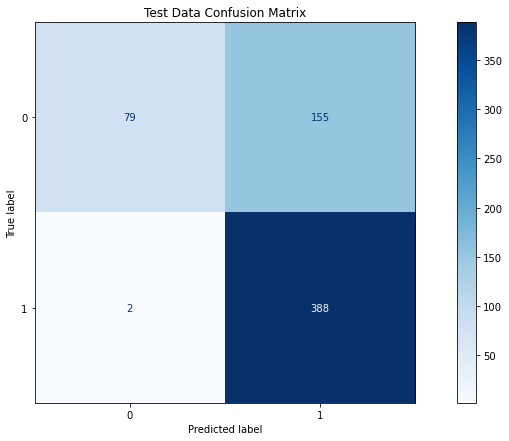

In [87]:
fig, ax = plt.subplots(figsize = (15,7))
ax.set_title('Test Data Confusion Matrix')

labels = training_data.class_names

cm = confusion_matrix(labels_batch, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues, ax = ax);

In [88]:
reconstructed_model.evaluate(test_data)

1/1 [==============================] - 0s 1ms/step - loss: 2.5100 - accuracy: 0.7484


[2.5100059509277344, 0.7483974099159241]

In [46]:
#image_batch[0][0]


# Model 2 (Class weights)

In [90]:
model_2 = Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(28, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

In [91]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [92]:
epochs=4
history_2 = model_2.fit(
  training_data,
  validation_data = validation_data,
  epochs=epochs,
    class_weight = {0:2.88, 1:1}
)

Epoch 1/4
131/131 [==============================] - 132s 1s/step - loss: 0.7686 - accuracy: 0.8641 - val_loss: 0.2695 - val_accuracy: 0.9099
Epoch 2/4
131/131 [==============================] - 133s 1s/step - loss: 0.3017 - accuracy: 0.9269 - val_loss: 0.3793 - val_accuracy: 0.8715
Epoch 3/4
131/131 [==============================] - 133s 1s/step - loss: 0.1636 - accuracy: 0.9583 - val_loss: 0.1674 - val_accuracy: 0.9310
Epoch 4/4
131/131 [==============================] - 145s 1s/step - loss: 0.1524 - accuracy: 0.9573 - val_loss: 0.1191 - val_accuracy: 0.9559


In [93]:
model_2.evaluate(test_data)

1/1 [==============================] - 0s 6ms/step - loss: 0.8106 - accuracy: 0.8013


[0.8105863332748413, 0.8012820482254028]

In [94]:
predictions_2 = (model_2.predict(test_data) > 0.5).astype('int32')

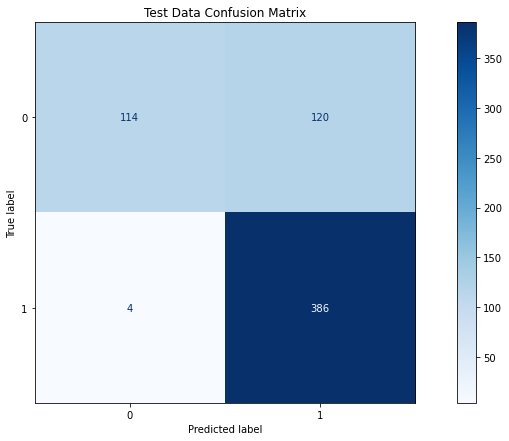

In [95]:
fig, ax = plt.subplots(figsize = (15,7))
ax.set_title('Test Data Confusion Matrix')

labels = training_data.class_names

cm = confusion_matrix(labels_batch, predictions_2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues, ax = ax);

In [96]:
model_2.save("Kyle_Mod_2")

INFO:tensorflow:Assets written to: Kyle_Mod_2/assets


# Model 3 - Trying augmentation


In [4]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [5]:
aug_ds = training_data.map( lambda x, y: (data_augmentation(x, training=True), y))

In [6]:
aug_ds

<MapDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [7]:
combined_dataset = training_data.concatenate(aug_ds)

In [8]:
combined_dataset

<ConcatenateDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [9]:
aug_val = validation_data.map( lambda x, y: (data_augmentation(x, training=True), y))

combined_val = validation_data.concatenate(aug_val)

In [107]:
model_3 = Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(28, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

In [108]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [109]:
epochs=4
history_3 = model_3.fit(
  combined_dataset,
  validation_data = combined_val,
  epochs=epochs,
    class_weight = {0:2.88, 1:1}
)

Epoch 1/4
262/262 [==============================] - 277s 1s/step - loss: 0.8903 - accuracy: 0.7568 - val_loss: 0.6259 - val_accuracy: 0.8289
Epoch 2/4
262/262 [==============================] - 276s 1s/step - loss: 0.7557 - accuracy: 0.8489 - val_loss: 0.5734 - val_accuracy: 0.8408
Epoch 3/4
262/262 [==============================] - 276s 1s/step - loss: 0.6402 - accuracy: 0.8828 - val_loss: 0.4810 - val_accuracy: 0.9137
Epoch 4/4
262/262 [==============================] - 276s 1s/step - loss: 0.5124 - accuracy: 0.9162 - val_loss: 0.4633 - val_accuracy: 0.8826


In [110]:
model_3.evaluate(test_data)

1/1 [==============================] - 0s 7ms/step - loss: 0.4336 - accuracy: 0.8862


[0.43359315395355225, 0.8862179517745972]

In [111]:
model_3.save("Kyle_Mod_3")

INFO:tensorflow:Assets written to: Kyle_Mod_3/assets


# Doubling Again

In [11]:
aug_ds_2 = combined_dataset.map( lambda x, y: (data_augmentation(x, training=True), y))
combined_dataset_2 = combined_dataset.concatenate(aug_ds_2)

In [12]:
aug_val_2 = combined_val.map( lambda x, y: (data_augmentation(x, training=True), y))

combined_val_2 = combined_val.concatenate(aug_val_2)

In [5]:
model_4 = Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(28, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

In [6]:
model_4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
epochs=10
history_4 = model_4.fit(
  combined_dataset_2,
  validation_data = combined_val_2,
  epochs=epochs,
    class_weight = {0:2.88, 1:1}
)

Epoch 1/10
524/524 [==============================] - 535s 1s/step - loss: 0.4581 - accuracy: 0.8563 - val_loss: 0.2276 - val_accuracy: 0.9113
Epoch 2/10
524/524 [==============================] - 538s 1s/step - loss: 0.2575 - accuracy: 0.9327 - val_loss: 0.2628 - val_accuracy: 0.8948
Epoch 3/10
524/524 [==============================] - 539s 1s/step - loss: 0.2140 - accuracy: 0.9422 - val_loss: 0.3212 - val_accuracy: 0.8859
Epoch 4/10
524/524 [==============================] - 542s 1s/step - loss: 0.1944 - accuracy: 0.9493 - val_loss: 0.2236 - val_accuracy: 0.9195
Epoch 5/10
524/524 [==============================] - 544s 1s/step - loss: 0.1761 - accuracy: 0.9545 - val_loss: 0.1659 - val_accuracy: 0.9377
Epoch 6/10
524/524 [==============================] - 544s 1s/step - loss: 0.1666 - accuracy: 0.9573 - val_loss: 0.2110 - val_accuracy: 0.9235
Epoch 7/10
524/524 [==============================] - 548s 1s/step - loss: 0.1655 - accuracy: 0.9585 - val_loss: 0.1938 - val_accuracy: 0.9245

In [15]:
model_4.evaluate(test_data)

1/1 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.8237


[0.6663528084754944, 0.8237179517745972]

In [16]:
model_4.save("Kyle_Mod_4")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Kyle_Mod_4/assets


# Mod 5 (Mod 4 but removed class weight)

In [20]:
model_5 = Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(28, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

In [21]:
model_5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
epochs=10
history_5 = model_5.fit(
  combined_dataset_2,
  validation_data = combined_val_2,
  epochs=epochs
)

Epoch 1/10
524/524 [==============================] - 543s 1s/step - loss: 0.2820 - accuracy: 0.8805 - val_loss: 0.2180 - val_accuracy: 0.9015
Epoch 2/10
524/524 [==============================] - 1017s 2s/step - loss: 0.1630 - accuracy: 0.9359 - val_loss: 0.1975 - val_accuracy: 0.9211
Epoch 3/10
524/524 [==============================] - 855s 2s/step - loss: 0.1356 - accuracy: 0.9469 - val_loss: 0.1356 - val_accuracy: 0.9480
Epoch 4/10
524/524 [==============================] - 538s 1s/step - loss: 0.1144 - accuracy: 0.9559 - val_loss: 0.1951 - val_accuracy: 0.9262
Epoch 5/10
524/524 [==============================] - 558s 1s/step - loss: 0.1012 - accuracy: 0.9615 - val_loss: 0.1298 - val_accuracy: 0.9511
Epoch 6/10
524/524 [==============================] - 610s 1s/step - loss: 0.0878 - accuracy: 0.9656 - val_loss: 0.1151 - val_accuracy: 0.9581
Epoch 7/10
524/524 [==============================] - 565s 1s/step - loss: 0.0830 - accuracy: 0.9697 - val_loss: 0.1454 - val_accuracy: 0.940

In [26]:
model_5.evaluate(test_data)

1/1 [==============================] - 0s 1ms/step - loss: 1.6873 - accuracy: 0.7035


[1.6873407363891602, 0.7035256624221802]

In [25]:
model_5.save("Kyle_Mod_5")

INFO:tensorflow:Assets written to: Kyle_Mod_5/assets


# Model 6 - repeat model 3 with 128 neurons in dense layer

In [10]:
model_6 = Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

In [11]:
model_6.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
epochs=4
history_6 = model_6.fit(
  combined_dataset,
  validation_data = combined_val,
  epochs=epochs,
    class_weight = {0:2.88, 1:1}
)

Epoch 1/4
262/262 [==============================] - 335s 1s/step - loss: 0.6768 - accuracy: 0.7871 - val_loss: 0.5576 - val_accuracy: 0.7157
Epoch 2/4
262/262 [==============================] - 332s 1s/step - loss: 0.3554 - accuracy: 0.9017 - val_loss: 0.1856 - val_accuracy: 0.9243
Epoch 3/4
262/262 [==============================] - 339s 1s/step - loss: 0.2403 - accuracy: 0.9349 - val_loss: 0.2392 - val_accuracy: 0.9099
Epoch 4/4
262/262 [==============================] - 305s 1s/step - loss: 0.2147 - accuracy: 0.9425 - val_loss: 0.1684 - val_accuracy: 0.9358


In [15]:
model_6.evaluate(test_data)

1/1 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.8045


[0.5063704252243042, 0.8044871687889099]

In [16]:
model_6.save("Kyle_Mod_6")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Kyle_Mod_6/assets


In [16]:
classes = ['PNEUMONIA','NORMAL','PNEUMONIA','PNEUMONIA','PNEUMONIA','PNEUMONIA','NORMAL','NORMAL','NORMAL']
predictions = ['PNEUMONIA','NORMAL','PNEUMONIA','PNEUMONIA','PNEUMONIA','PNEUMONIA','NORMAL','NORMAL','PNEUMONIA']

In [52]:
from IPython.display import clear_output
import time
plt.figure(figsize=(5, 5))
for image, label in training_data.take(1):
    for i in [0,1,2,7,8,5,6,3,4]:
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.show()
        if i == 8:
            print('Model Predicts', predictions[i],"\033[1;31m— INCORRECT!  \n")
        else:
            print('Model Predicts', predictions[i],"\033[1;32m— CORRECT!  \n")
        time.sleep(3)
        clear_output()
        

In [24]:
print("\033[1;32m This text is Bright Green  \n")

 This text is Bright Green  



In [1]:
print("\033[1;31m This text is Bright Red  \n")

 This text is Bright Red  

